In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import re
from nltk import wordpunct_tokenize, word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
pd.options.display.max_colwidth = 500

In [110]:
sw = stopwords.words('english')
# append rt (Retweet), rts (Retweets), u (you), amp (& character), and empty characters to the list of stop words
sw.append('rt')
sw.append('rts')
sw.append('u')
sw.append('amp')
sw.append('')

In [4]:
def getHashtags(string):
    hashtagList = []
    stringList = re.split(' |\n', string)
    result = [i for i in stringList if '#' in i]
    for string in result:
        hashtagList.append(string)
        
    return hashtagList

In [5]:
def removeSubstring(substringList, string):
    stringList = re.split(' |\n|!|,|;|?|-|/', string)
    for substring in substringList:
        result = [i for i in stringList if substring in i]
        for string in result:
            stringList.remove(string)
    
    return " ".join(stringList)

In [6]:
def word_count_text_processor(x):
    x = x.lower()
    # remove all https://hyperlinks, #hashtags, and @mentions from the text
    x = removeSubstring(['http://', 'https://', '#', '@'], x)
    tokens = wordpunct_tokenize(x)
    tokens = [tok for tok in tokens if tok.isalnum()]
    tokens = [tok for tok in tokens if tok not in sw]
    return(tokens)

In [7]:
def word_count(file):
    df = pd.read_csv(file)
    text_clean = df['Text'].apply(word_count_text_processor)
    all_text = []
    for words in text_clean:
        all_text += words
    c = Counter(all_text)
    return c.most_common(20)

# Word Count

In [58]:
test = pd.read_csv('acting_hashtag_5000.csv')

In [59]:
x = pd.DataFrame([['#acting', test, word_count('acting_hashtag_5000.csv')]], columns=['HashtagQuery', 'HashtagDF', 'CommonWords'])

In [60]:
x

,HashtagQuery,HashtagDF,CommonWords
0,#acting,Datetime Tweet Id \ 0 2020-12-06 22:03:04 1335706349120991233 1 2020-12-06 22:02:04 1335706097085104128 2 2020-12-06 22:00:30 1335705701423964160 3 2020-12-06 22:00:09 1335705614740230146 4 2020-12-06 22:00:03 1335705591793192961 ... ... ... 3888 2020-11-27 19:17:14 1332403125546864648 3889 2020-11-27 19:11:45 1332401746300301316 3890 2020-11-27 19:11:32 1332401688649428992...,"[(one, 340), (acting, 334), (6, 306), (photo, 226), (9, 223), (headshots, 221), (looks, 218), (session, 215), (295, 210), (2hr, 210), (checked, 208), (love, 192), (watch, 179), (great, 178), (new, 173), (film, 172), (show, 151), (get, 149), (check, 142), (time, 142)]"


In [100]:
df = pd.DataFrame()

In [101]:
df['acting'] = word_count('acting_hashtag_5000.csv')

In [103]:
df['actorslife'] = word_count('actorslife_hashtag_5000.csv')

In [105]:
df['audition'] = word_count('audition_hashtag_5000.csv')

In [106]:
df['filmfestival'] = word_count('filmfestival_hashtag_5000.csv')

In [107]:
df['karate'] = word_count('karate_hashtag_5000.csv')

In [108]:
df['martialarts'] = word_count('martialarts_hashtag_5000.csv')

In [109]:
df['mma'] = word_count('mma_hashtag_5000.csv')

In [110]:
df['monologue'] = word_count('monologue_hashtag_5000.csv')

In [111]:
df['selfdefense'] = word_count('selfdefense_hashtag_5000.csv')

In [112]:
df['taekwondo'] = word_count('taekwondo_hashtag_5000.csv')

In [113]:
df

,acting,actorslife,audition,filmfestival,karate,martialarts,mma,monologue,selfdefense,taekwondo
0,"(one, 340)","(new, 344)","(casting, 241)","(film, 1458)","(karate, 178)","(young, 1640)","(performance, 2125)","(monologue, 45)","(defense, 235)","(taekwondo, 148)"
1,"(acting, 334)","(love, 323)","(call, 232)","(festival, 1158)","(martial, 97)","(600, 979)","(awards, 1969)","(written, 28)","(self, 190)","(2020, 67)"
2,"(6, 306)","(film, 268)","(character, 228)","(2020, 613)","(arts, 75)","(tournament, 827)","(2020, 1671)","(new, 27)","(kyle, 91)","(world, 58)"
3,"(photo, 226)","(time, 262)","(version, 227)","(short, 515)","(kata, 64)","(n, 797)","(mma, 1590)","(one, 26)","(via, 71)","(online, 58)"
4,"(9, 223)","(one, 258)","(text, 226)","(official, 403)","(training, 60)","(long, 796)","(love, 1471)","(play, 19)","(women, 64)","(one, 53)"
5,"(headshots, 221)","(working, 247)","(found, 226)","(films, 402)","(best, 58)","(youth, 793)","(melon, 1419)","(performed, 17)","(please, 59)","(level, 51)"
6,"(looks, 218)","(photo, 239)","(g, 154)","(december, 368)","(today, 57)","(1, 792)","(music, 1381)","(act, 15)","(carry, 58)","(kick, 50)"
7,"(session, 215)","(day, 229)","(z, 73)","(international, 363)","(like, 57)","(3, 746)","(best, 1282)","(monologues, 15)","(rittenhouse, 44)","(championships, 50)"
8,"(295, 210)","(today, 223)","(audition, 36)","(selection, 316)","(new, 49)","(championship, 742)","(201205, 1228)","(part, 14)","(beginners, 43)","(poomsae, 49)"
9,"(2hr, 210)","(get, 222)","(actors, 31)","(get, 268)","(team, 49)","(old, 716)","(stage, 1109)","(films, 14)","(keep, 40)","(preliminary, 48)"


In [64]:
acting = pd.read_csv('acting_hashtag_5000.csv')

In [65]:
# create a Hashtags column that contains a list of all the hashtags used in the respective tweet
acting['Hashtags'] = acting['Text'].apply(getHashtags)

In [66]:
text_clean = acting['Text'].apply(word_count_text_processor)

In [68]:
all_text = []
for words in text_clean:
    all_text += words

In [31]:
c = Counter(all_text) 

In [77]:
c.most_common(20)

[('one', 340),
 ('acting', 334),
 ('6', 306),
 ('photo', 226),
 ('9', 223),
 ('headshots', 221),
 ('looks', 218),
 ('session', 215),
 ('295', 210),
 ('2hr', 210),
 ('checked', 208),
 ('love', 192),
 ('watch', 179),
 ('great', 178),
 ('new', 173),
 ('film', 172),
 ('show', 151),
 ('get', 149),
 ('check', 142),
 ('time', 142)]

# KMeans

In [145]:
def tfidf_text_processor(x):
    x = x.lower()
    x = removeSubstring(['http://', 'https://', '#', '@'], x)
    x = re.split(' |,|;|&|!|\?|/|\.', x)
    tokens = [tok for tok in x if tok.isalnum()]
    tokens = [tok for tok in x if tok not in sw]
    return ' '.join(tokens)

In [188]:
def plot_wcss(text):
    tf = TfidfVectorizer()
    X = tf.fit_transform(text)
    wcss = []
    for k in range(5,51,5):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(np.arange(5,51,5),wcss,marker="o")
    plt.xlabel('Number of Clusters, K')
    plt.ylabel('WCSS')

In [225]:
def fit_kmeans(k):
    kmeans = MiniBatchKMeans(k)
    kmeans.fit(X)
    labs = kmeans.predict(X)
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = tf.get_feature_names()
    for i in range(k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

hashtags to use: 
- acting
- actors life
- martial arts
- mma
- self defense
- film festival
- cobra kai

# #acting

In [190]:
acting = pd.read_csv('acting_hashtag_5000.csv')

In [191]:
clean_text = acting['Text'].apply(tfidf_text_processor)

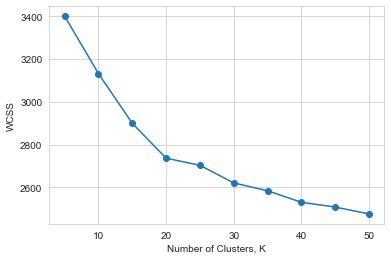

In [195]:
plot_wcss(clean_text)

In [196]:
fit_kmeans(20)

Cluster 0: casting luck good commercial exchange today gabbidon pratt isabelle courtney
Cluster 1: borda contagious albert einstein creativity pass morning mrt good checking
Cluster 2: checked page website imdb channel music play 𝘄𝗲 fabulous face
Cluster 3: becoz mom become fan show watch room process tell leave
Cluster 4: marcus dyed thoughts becomes colour soul think teachers reflection struggle
Cluster 5: 295 2hr session looks headshots photo 20th lovelies photoshooting improvised
Cluster 6: check link contact bio info please likes following leave buddies
Cluster 7: denver koch phil yesterday john dreams tomorrow one proper setup
Cluster 8: via viewing youtube little available love failures faces facing fact
Cluster 9: thank much line loved amazing work comedy completed way martial
Cluster 10: allan poe strangeness timothy edgar beauty without martin get fact
Cluster 11: career africa acting training best build ig improve purpose way
Cluster 12: one solitary transform realities tota

# #actorslife

In [198]:
actorslife = pd.read_csv('actorslife_hashtag_5000.csv')

In [199]:
clean_text = actorslife['Text'].apply(tfidf_text_processor)

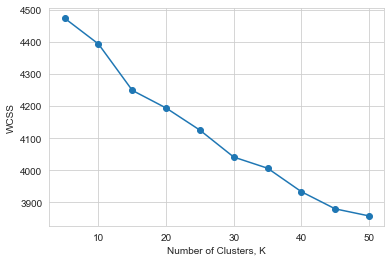

In [201]:
plot_wcss(clean_text)

In [203]:
fit_kmeans(15)

Cluster 0: birthday happy today performance harris exchange ed premiere casting loveland
Cluster 1: december craft film master proves the he martin things great
Cluster 2: go live calling info love ig purpose night 6pm past
Cluster 3: 295 2hr session photo looks headshots deserves emmy photoshooting summer
Cluster 4: thespian unlimited clothing heart believe seat fact fabulous face facebook
Cluster 5: check actor day inspires enjoy click videos re podcast we
Cluster 6: checked page imdb website channel music play sixth form fb
Cluster 7: dyed marcus soul colour becomes thoughts teachers stella adler reminds
Cluster 8: show mom becoz become fan watch realization looking producers tv
Cluster 9: actors shawn fbf lee support shot open books agency keep
Cluster 10: borda contagious albert einstein creativity pass 𝘄𝗲 facing fact facts
Cluster 11: one koch denver phil john yesterday dreams tomorrow transform solitary
Cluster 12: time love bridge rob everything work line video training course


# #martialarts

In [205]:
martialarts = pd.read_csv('martialarts_hashtag_5000.csv')

In [206]:
clean_text = martialarts['Text'].apply(tfidf_text_processor)

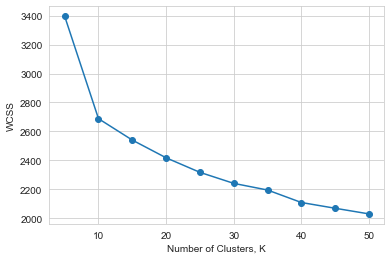

In [207]:
plot_wcss(clean_text)

In [209]:
fit_kmeans(10)

Cluster 0: nice happy received director comes lead naturally awards really embody
Cluster 1: checked page website imdb channel music play sept changes rwcmd
Cluster 2: martin amis aquasixio alone happen interesting things the edgar poe
Cluster 3: one denver koch phil john yesterday dreams transform solitary realities
Cluster 4: becoz mom become fan show watch whenever thing able create
Cluster 5: 295 2hr session looks headshots photo merman casual vibes modeling
Cluster 6: work like great time look place video one fanpage film
Cluster 7: acting love december check new everything pass master he einstein
Cluster 8: good casting luck commercial kkjha sisya bollywood duet now morning
Cluster 9: marcus dyed colour becomes thoughts soul aurelius ninagawa mika teachers


# #mma

In [210]:
mma = pd.read_csv('mma_hashtag_5000.csv')

In [211]:
clean_text = mma['Text'].apply(tfidf_text_processor)

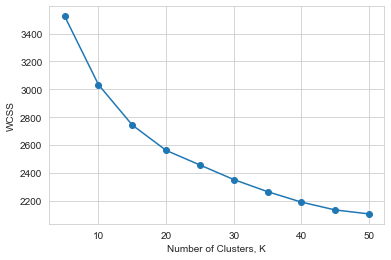

In [212]:
plot_wcss(clean_text)

In [222]:
fit_kmeans(20)

Cluster 0: soul thoughts becomes colour dyed marcus acting great new film
Cluster 1: page checked imdb 𝘄𝗲 fail facebook faces facing fact facts
Cluster 2: pass contagious borda albert einstein creativity annual raffle win masterclass
Cluster 3: casting luck commercial good baynard chizuko smith rachel hill exchange
Cluster 4: series web interested episode role starts cancelled actress darren criss
Cluster 5: fanpage place weird get like one film year today 50
Cluster 6: becoz mom become show fan watch room process tell leave
Cluster 7: 295 2hr session looks headshots photo us join dialect dracula
Cluster 8: everything bridge rob love comes planned success voiceovers goes spoken
Cluster 9: one yesterday koch denver phil john dreams tomorrow realities transform
Cluster 10: think acting good morning career time reflection success struggle barr
Cluster 11: martin strangeness allan poe timothy edgar beauty interesting aquasixio amis
Cluster 12: actors cartoon spotlight non get make let acto

# #selfdefense

In [213]:
selfdefense = pd.read_csv('selfdefense_hashtag_5000.csv')

In [214]:
clean_text = selfdefense['Text'].apply(tfidf_text_processor)

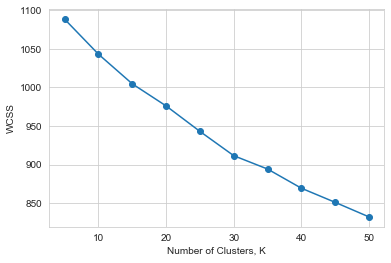

In [215]:
plot_wcss(clean_text)

In [223]:
fit_kmeans(30)

Cluster 0: acting great good want work check actor film new one
Cluster 1: one transform solitary realities totally million lucky maya fantasy iconic
Cluster 2: 295 2hr session looks headshots photo faculty face facebook faces
Cluster 3: mom becoz become fan show watch rehearsal feels school old
Cluster 4: cookout actresses coed college cookbook cooking girls smart auditioning guys
Cluster 5: farrow mia 𝘄𝗲 fail facebook faces facing fact facts faculty
Cluster 6: page checked imdb 𝘄𝗲 fail facebook faces facing fact facts
Cluster 7: denver koch phil john yesterday dreams tomorrow one deptartment undergraduate
Cluster 8: weird fanpage place like get one thanks woo please great
Cluster 9: learn together home auditions crown workshops thomas dialogue conducts delivery
Cluster 10: allan timothy strangeness poe edgar beauty without martin faces facing
Cluster 11: bridge rob everything love absolutely new headshots kidnapped aliens smoking
Cluster 12: unlimited clothing thespian heart believe 

# #filmfestival

In [216]:
filmfestival = pd.read_csv('filmfestival_hashtag_5000.csv')

In [217]:
clean_text = filmfestival['Text'].apply(tfidf_text_processor)

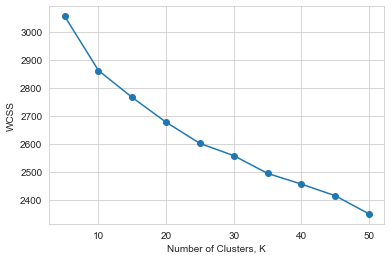

In [218]:
plot_wcss(clean_text)

In [224]:
fit_kmeans(10)

Cluster 0: one acting martin things the yesterday happen alone interesting new
Cluster 1: contagious borda albert einstein creativity pass mrt 𝘄𝗲 fail facing
Cluster 2: dyed marcus becomes colour thoughts soul teachers variety preeminent showed
Cluster 3: love bridge rob everything calling info live go acting joy
Cluster 4: get time find year including work working creative it hard
Cluster 5: becoz mom become show fan watch released summer gt victoriously
Cluster 6: share soon like excited exciting breaking video enjoy click check
Cluster 7: checked page imdb website channel music sixth form equivalent vocational
Cluster 8: 295 2hr headshots session looks photo heashots prettiest encapsulate handsome
Cluster 9: see wait can anyone students young enterococcus silence intermediate know


# #cobrakai

In [219]:
cobrakai = pd.read_csv('cobrakai_hashtag_5000.csv')

In [220]:
clean_text = cobrakai['Text'].apply(tfidf_text_processor)

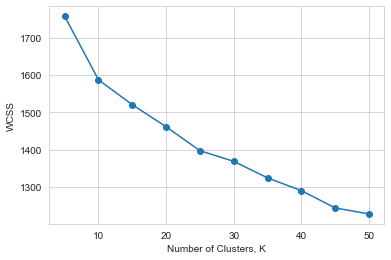

In [221]:
plot_wcss(clean_text)

In [226]:
fit_kmeans(10)

Cluster 0: show watch fan become mom becoz acting december check actor
Cluster 1: love bridge rob everything calling info live go acting bodyguard
Cluster 2: dyed marcus becomes colour thoughts soul aurelius mika ninagawa reel
Cluster 3: great good unlimited work believe casting thespian clothing heart actors
Cluster 4: 295 2hr session headshots looks photo updated amazing thank work
Cluster 5: contagious borda albert einstein creativity pass mrt 𝘄𝗲 fail facing
Cluster 6: checked page website imdb channel music play 𝘄𝗲 fabulous face
Cluster 7: contact bio info ig purpose 6pm let past present talking
Cluster 8: martin amis aquasixio alone interesting happen things the edgar timothy
Cluster 9: one koch denver phil john yesterday dreams tomorrow transform solitary
